In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os
import datetime

# Import API key
#from api_keys import api_key
#from api_keys2 import api_key  #cus I know I'm going to screw this part up
from api_keys3 import api_key  #cus I know I'm going to screw this part up more then once.

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


#Useful links:
#- API documentation https://openweathermap.org/api


## Generate Cities List

In [64]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [65]:
#print cities to output_data folder
# Specify the file to write to
output_data_file = os.path.join("output_data","cities.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_data_file, 'w', newline='') as csvfile:
    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')
    # Write the first row (column headers)
    for city in cities:
        csvwriter.writerow([city])

#testing
#for city in cities:
#    print(city)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
#Creating base URL and empty dataframe
url = f'https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q='
data_df = pd.DataFrame({'City':[],
                        'Cloudiness':[],
                        'Country':[],
                        'Date':[],
                        'Humidity':[],
                        'Lat':[],
                        'Lng':[],
                        'Max_temp':[],
                        'Wind_speed':[]
                       })

#testing
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 9 columns):
City          0 non-null float64
Cloudiness    0 non-null float64
Country       0 non-null float64
Date          0 non-null float64
Humidity      0 non-null float64
Lat           0 non-null float64
Lng           0 non-null float64
Max_temp      0 non-null float64
Wind_speed    0 non-null float64
dtypes: float64(9)
memory usage: 76.0 bytes


In [67]:
#API request for every city and populating dataframe -loop
i = 0
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response['cod'] == 200):
        i = i+1
        print(f'Procesing Record {i} | {city}')
        print(response_req.url)

        data_df.loc[i,'City'] = city
        data_df.loc[i,'Country'] = response['sys']['country']
        data_df.loc[i,'Date'] = response['dt'] 
        data_df.loc[i,'Lat'] = response['coord']['lat']
        data_df.loc[i,'Lng'] = response['coord']['lon']
        data_df.loc[i,'Cloudiness'] = response['clouds']['all']
        data_df.loc[i,'Humidity'] = response['main']['humidity']
        data_df.loc[i,'Max_temp'] = response['main']['temp_max']
        data_df.loc[i,'Wind_speed'] = response['wind']['speed']
    else:
        print('City not found? Skip it.')
            
print("~*~*~*~*~*~*~*~*~*~*~*~*~*~*")
print("Data Retrieval Complete")      
print("~*~*~*~*~*~*~*~*~*~*~*~*~*~*")

Procesing Record 1 | rikitea
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=rikitea
Procesing Record 2 | russell
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=russell
Procesing Record 3 | hilo
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=hilo
Procesing Record 4 | port elizabeth
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=port%20elizabeth
Procesing Record 5 | sitka
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=sitka
Procesing Record 6 | yulara
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=yulara
Procesing Record 7 | spas-demensk
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=spas-demensk

Procesing Record 58 | solnechnyy
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=solnechnyy
Procesing Record 59 | shenjiamen
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=shenjiamen
Procesing Record 60 | katsuura
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=katsuura
Procesing Record 61 | rabo de peixe
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=rabo%20de%20peixe
Procesing Record 62 | narovchat
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=narovchat
Procesing Record 63 | charters towers
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=charters%20towers
City not found? Skip it.
Procesing Record 64 | atuona
https://api.openweathermap.org/data/2.5/we

Procesing Record 114 | alihe
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=alihe
Procesing Record 115 | tiksi
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=tiksi
Procesing Record 116 | mar del plata
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=mar%20del%20plata
Procesing Record 117 | maceio
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=maceio
Procesing Record 118 | albany
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=albany
Procesing Record 119 | longyearbyen
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=longyearbyen
Procesing Record 120 | qaanaaq
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=impe

Procesing Record 169 | arman
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=arman
Procesing Record 170 | santa vitoria do palmar
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=santa%20vitoria%20do%20palmar
Procesing Record 171 | barrow
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=barrow
Procesing Record 172 | krasnokamensk
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=krasnokamensk
Procesing Record 173 | bonthe
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=bonthe
Procesing Record 174 | cidreira
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=cidreira
Procesing Record 175 | morehead
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5

Procesing Record 224 | pavlodar
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=pavlodar
Procesing Record 225 | touros
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=touros
Procesing Record 226 | puerto escondido
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=puerto%20escondido
City not found? Skip it.
Procesing Record 227 | okhotsk
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=okhotsk
Procesing Record 228 | talnakh
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=talnakh
Procesing Record 229 | makakilo city
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=makakilo%20city
Procesing Record 230 | laguna
https://api.openweathermap.org/data/2.5/weather?APPID

City not found? Skip it.
Procesing Record 280 | cerritos
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=cerritos
City not found? Skip it.
Procesing Record 281 | bartica
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=bartica
Procesing Record 282 | vestmanna
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=vestmanna
Procesing Record 283 | buraydah
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=buraydah
Procesing Record 284 | abonnema
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=abonnema
Procesing Record 285 | peterhead
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=peterhead
Procesing Record 286 | hornepayne
https://api.openweathermap.org/data/2.5/weat

Procesing Record 336 | karasuyama
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=karasuyama
City not found? Skip it.
Procesing Record 337 | san vicente
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=san%20vicente
Procesing Record 338 | college
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=college
Procesing Record 339 | saint-francois
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=saint-francois
Procesing Record 340 | los llanos de aridane
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=los%20llanos%20de%20aridane
Procesing Record 341 | san andres
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=san%20andres
Procesing Record 342 | lagoa
https://api.open

Procesing Record 390 | gushikawa
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=gushikawa
Procesing Record 391 | kiunga
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=kiunga
Procesing Record 392 | upernavik
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=upernavik
Procesing Record 393 | oranjemund
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=oranjemund
Procesing Record 394 | fare
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=fare
Procesing Record 395 | vallenar
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=vallenar
Procesing Record 396 | horsham
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q

Procesing Record 446 | skelleftea
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=skelleftea
Procesing Record 447 | sao felix do xingu
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=sao%20felix%20do%20xingu
Procesing Record 448 | keti bandar
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=keti%20bandar
Procesing Record 449 | gubkinskiy
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=gubkinskiy
Procesing Record 450 | kobayashi
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=kobayashi
City not found? Skip it.
City not found? Skip it.
Procesing Record 451 | sibolga
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=sibolga
Procesing Record 452 | brownfield
http

Procesing Record 501 | suwannaphum
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=suwannaphum
Procesing Record 502 | yeppoon
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=yeppoon
Procesing Record 503 | zhangye
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=zhangye
City not found? Skip it.
Procesing Record 504 | angoche
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=angoche
Procesing Record 505 | matamoros
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=matamoros
Procesing Record 506 | merauke
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3074ad11bc4&units=imperial&q=merauke
Procesing Record 507 | cutro
https://api.openweathermap.org/data/2.5/weather?APPID=200baa4bd4a5fc354e50c3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
#CVS convertion
# Specify the file to write to
output_data_file = os.path.join("output_data","weatherHW_data.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_data_file, 'a',) as f:
    data_df.to_csv(f, header=f.tell()==0)

#https://stackoverflow.com/questions/17530542/how-to-add-pandas-data-to-an-existing-csv-file
#https://datatofish.com/export-dataframe-to-csv/
    
data_df.to_csv('weatherHW_data.csv') #oh my god I love this! so short so simple
data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,rikitea,80.0,PF,1.547360e+09,99.0,-23.12,-134.97,79.49,15.21
2,russell,75.0,AR,1.547359e+09,88.0,-33.01,-68.80,64.40,4.70
3,hilo,75.0,US,1.547355e+09,81.0,19.71,-155.08,71.06,5.82
4,port elizabeth,90.0,US,1.547359e+09,92.0,39.31,-74.98,26.96,3.36
5,sitka,48.0,US,1.547360e+09,89.0,37.17,-99.65,24.50,6.64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

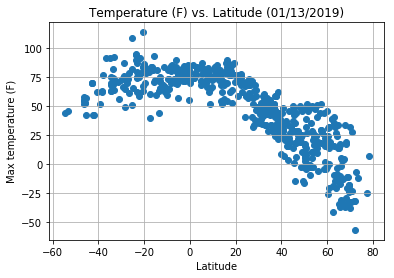

In [69]:


date = time.strftime("%m/%d/%Y")
#date = datetime.now()     #uses the import datetime dependencies

plt.figure()
plt.scatter(data_df['Lat'],data_df['Max_temp'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title(f"Temperature (F) vs. Latitude ({date})")
plt.savefig('LatvsTemp.png')

#https://www.devdungeon.com/content/working-binary-data-python
#with open(output_data_file, "w", newline="") as img:
#    writer = csv.writer(datafile)
#def open_file_cm(output_data_file, mode="r", encoding=None):
#--> 626     fh, opened = to_filehandle(path_or_file, mode, True, encoding)
#    627     if opened:
#    628         with fh:
        
#https://stackoverflow.com/questions/41586429/opencv-saving-images-to-a-particular-folder-of-choice
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html
#https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig
#https://stackoverflow.com/questions/13642528/how-to-export-figures-to-files-from-ipython-notebook
#http://www.jesshamrick.com/2012/09/03/saving-figures-from-pyplot/
#https://www.geeksforgeeks.org/working-images-python/

#### Latitude vs. Humidity Plot

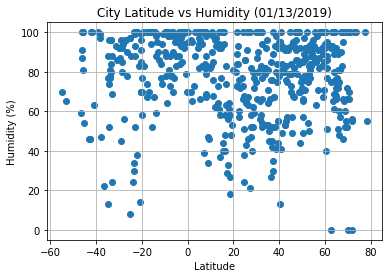

In [70]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Humidity'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({date})")
plt.savefig('LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

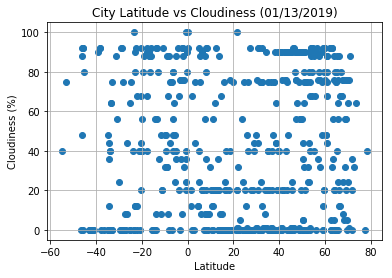

In [71]:

plt.figure()
plt.scatter(data_df['Lat'],data_df['Cloudiness'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.savefig('LatvsCloudiness.png')

#### Latitude vs. Wind Speed Plot

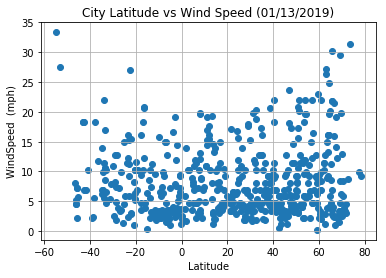

In [72]:

plt.figure()
plt.scatter(data_df['Lat'],data_df['Wind_speed'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('WindSpeed  (mph)')
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.savefig('LatvsWindSpeed.png')